# Описание проекта

Отделом маркетинга и аналитики был подготовлен список гипотез для увеличения выручки.

В рамках проекта требуется приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from scipy import stats

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 1000

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

# Анализ входных данных

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypothesis.duplicated().sum()

0

In [6]:
orders.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


In [7]:
orders.columns = orders.columns.str.lower()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
orders.duplicated().sum()

0

In [10]:
visitors.head(1)

,date,group,visitors
0,2019-08-01,A,719


In [11]:
visitors.columns = visitors.columns.str.lower()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
visitors.duplicated().sum()

0

### вывод

проанализировали входные датасеты

привели к правильному формату наименования колонок, тип колонки "date"

во входных данных дублей не обнаружено

# Часть 1. Приоритизация гипотез

In [14]:
# Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
print(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

In [15]:
# Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

In [16]:
# Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### Вывод 

В фреймворке ICE на первом месте оказалась гипотеза N8
При расчете по фреймоворку RICE гипотеза 8 оказалась лишь на 5 месте, а на первом месте с большим отрывом от других оказалась гипотеза N7

Отличия обусловлены тем, что RICE, в отличие от ICE, учитывает такой параметра как Reach — скольких пользователей затронет изменение, которое вы хотите внести
Гипотеза N7 имеет наибольшее значение Reach (=10) среди всех гипотез.

Считаю, что основной упор надо сделать на топ4 гипотез, рассчитанных по RICE (>=40), так как в них учитан показатель Reach, играющий важную роль:
- 7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
- 2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
- 0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
- 6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   

# Часть 2. Анализ A/B-теста

## Анализ стабильности кумулятивных метрик

In [17]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


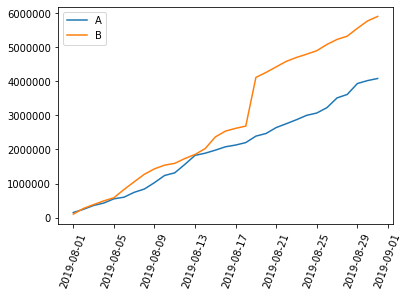

In [18]:
# Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

# plt.figure(figsize=(30,15))

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=70)

plt.legend()

Выручка почти равномерно увеличивается в течение всего теста.

Однако графики выручки группы B имеет резкий рост в начале второй половины теста. 
Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

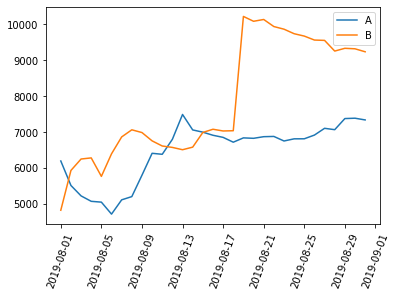

In [19]:
# Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
# plt.figure(figsize=(30,15))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation=70)
plt.legend()

Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. 

Возможно, в группу B в начале второй половине теста попали крупные заказы (резкий всплеск на графике).
Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

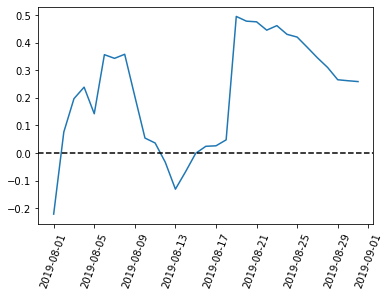

In [20]:
# Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.xticks(rotation=70)

plt.axhline(y=0, color='black', linestyle='--')

В нескольких точках график различия между сегментами резко «скачет».
В целом группа B превосходит над группой А, во второй половине теста относительно изменение начало снижаться

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

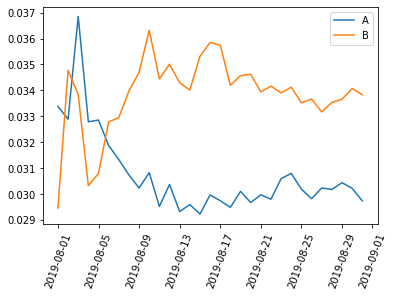

In [21]:
# Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.xticks(rotation=70)

Конверсия группы B значительно больше конверсии группы А, хоть и в самом начале теста ситуация была обратная

No handles with labels found to put in legend.


(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

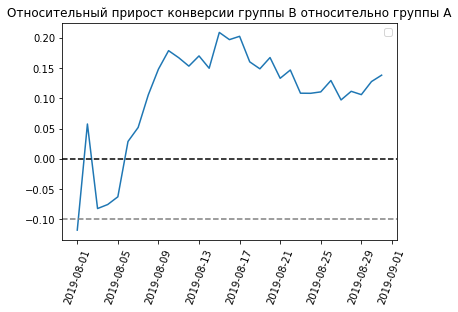

In [22]:
# Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title("Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation=70)

## Анализ выбросов и всплесков

(array([1.195e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+01, 1.294950e+05, 2.589400e+05, 3.883850e+05,
        5.178300e+05, 6.472750e+05, 7.767200e+05, 9.061650e+05,
        1.035610e+06, 1.165055e+06, 1.294500e+06]),
 <a list of 10 Patch objects>)

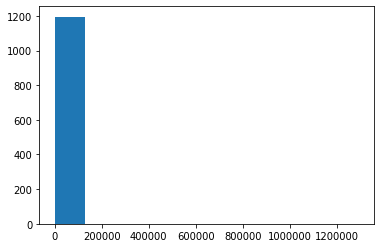

In [23]:
# Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
plt.hist(orders['revenue']) 

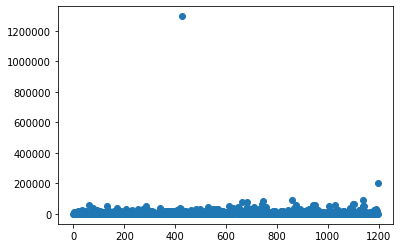

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

[0, 1210, 0, 200000]

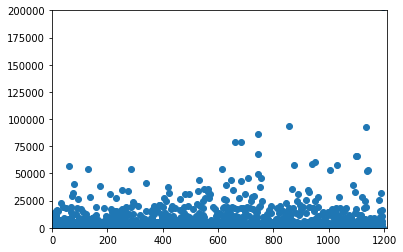

In [25]:
plt.scatter(x_values, orders['revenue']) 
plt.axis([0, 1210, 0, 200000])

Есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов больше 100000. 

Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

In [26]:
# Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
percentiles_revenue = np.percentile(orders['revenue'], [90, 95, 99])
print(percentiles_revenue) 

[18168.  28000.  58233.2]


In [27]:
percentiles_95_revenue = percentiles_revenue[1]
percentiles_95_revenue

28000.000000000004

Не более 5% заказов дороже 28 000 и не более 1% дороже 58 233.
За границу аномальных заказов выбираем 28000.



In [28]:
# Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

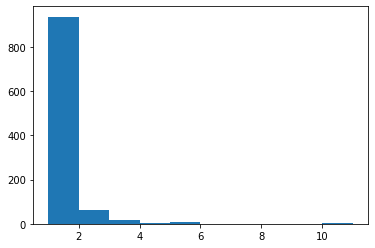

In [29]:
plt.hist(ordersByUsers['orders']) 

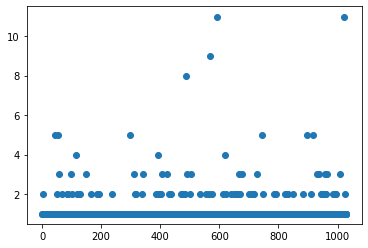

In [30]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

Большинство покупателей заказывали только один раз. 

Однако доля пользователей с 2-4 заказами тоже значительна.

In [31]:
# Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
percentiles_95_orders = np.percentile(ordersByUsers['orders'], [90, 95, 99])
print(percentiles_95_orders)

[1. 2. 4.]


In [32]:
percentiles_95_orders = percentiles_95_orders[1]
percentiles_95_orders

2.0

Не более 5% пользователей оформляли больше чем 2 заказов. И 10% пользователей заказывали более 1 раза.

Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

## Расчет статистической значимости

In [33]:
orders.rename(columns={'transactionid':'orderId', 'visitorid':'userId'}, inplace=True)
orders.head(1)

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


In [34]:
# orders['date'] = orders['date'].map(
#     lambda x: datetime.strptime(x, '%Y-%m-%d')
# )

# visitors['date'] = visitors['date'].map(
#     lambda x: datetime.strptime(x, '%Y-%m-%d')
# )

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [35]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [36]:
# Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
print("""Описание Гипотезы:
    Рабочая: Есть различия в конверсии между группами по «сырым» данным.
    Стат. гипотезы:
        H0 - нет значимых различий между средними значениями в конверсии двух выборок.
        H1 - есть значимые различия между средними значениями в конверсии двух выборок.
""")

print("Статистическая значимость различий в конверсии между группами по «сырым» данным= {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительное различие = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Описание Гипотезы:
    Рабочая: Есть различия в конверсии между группами по «сырым» данным.
    Стат. гипотезы:
        H0 - нет значимых различий между средними значениями в конверсии двух выборок.
        H1 - есть значимые различия между средними значениями в конверсии двух выборок.

Статистическая значимость различий в конверсии между группами по «сырым» данным= 0.008
Относительное различие = 0.138


По «сырым» данным различия в конверсии групп A и B присутствуют.

Первое число — p-value = 0.008 меньше 0.05. 
Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 

Относительный выигрыш группы B равен 13.8% — второе число в выводе.

In [37]:
# Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
print("""Описание Гипотезы:
    Рабочая: Есть различия в среднем чеке между группами по «сырым» данным.
    Стат. гипотезы:
        H0 - нет значимых различий между средними значениями среднего чека двух выборок.
        H1 - есть значимые различия между средними значениями среднего чека двух выборок.
""")


print('Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным= {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Описание Гипотезы:
    Рабочая: Есть различия в среднем чеке между группами по «сырым» данным.
    Стат. гипотезы:
        H0 - нет значимых различий между средними значениями среднего чека двух выборок.
        H1 - есть значимые различия между средними значениями среднего чека двух выборок.

Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным= 0.365
Относительное различие = 0.259


P-value значительно больше 0.05. 
Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

Впрочем, средний чек группы B значительно выше среднего чека группы A.

## Производим чистку данных

In [38]:
# Узнаем, сколько всего аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > percentiles_95_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > percentiles_95_orders]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > percentiles_95_revenue]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: userId, dtype: int64
(74,)


Всего 37 аномальных пользователей

Узнаем, как их действия повлияли на результаты теста. 

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 

Сначала подготовим выборки количества заказов по пользователям по группам теста

In [39]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [40]:
# Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
print("""Описание Гипотезы:
    Рабочая: Есть различия в конверсии между группами по «очищенным» данным.
    Стат. гипотезы:
        H0 - нет значимых различий между средними значениями в конверсии двух выборок.
        H1 - есть значимые различия между средними значениями в конверсии двух выборок.
""")

print('Статистическая значимость различий в конверсии между группами по «очищенным» данным = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Описание Гипотезы:
    Рабочая: Есть различия в конверсии между группами по «очищенным» данным.
    Стат. гипотезы:
        H0 - нет значимых различий между средними значениями в конверсии двух выборок.
        H1 - есть значимые различия между средними значениями в конверсии двух выборок.

Статистическая значимость различий в конверсии между группами по «очищенным» данным = 0.007
Относительное различие = 0.173


p-value уменьшился, различие увеличилось, но в целом ситуация сильно не поменялась, отвергаем нулевую гипотезу

In [41]:
# Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
print("""Описание Гипотезы:
    Рабочая: Есть различия в среднем чеке между группами по «очищенным» данным.
    Стат. гипотезы:
        H0 - нет значимых различий между средними значениями среднего чека двух выборок.
        H1 - есть значимые различия между средними значениями среднего чека двух выборок.
""")


print(
    'Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное различие = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Описание Гипотезы:
    Рабочая: Есть различия в среднем чеке между группами по «очищенным» данным.
    Стат. гипотезы:
        H0 - нет значимых различий между средними значениями среднего чека двух выборок.
        H1 - есть значимые различия между средними значениями среднего чека двух выборок.

Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным = 0.369
Относительное различие = -0.020


p-value сильно увеличился, относительное различие же наоборот, упало практически до нуля и незначительно перевесило в пользу группы А
причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, по-прежнему нет.

In [42]:
# Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Вывод

- Имеется статистически значимое различия по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и имеется тенденция к улучшению
- График различия среднего чека говорит о том, что результаты группы B лучше группы А, но во второй половине теста имеется тенденция к уменьшению 

Исходя из обнаруженных фактов, можно сделать вывод что группа B победила, то есть тест следует остановить и признать его успешным. Можно принимать нововведения.